In [12]:
import functions_class as fx
import classx as cl
import matplotlib.pyplot as plt
import numpy as np

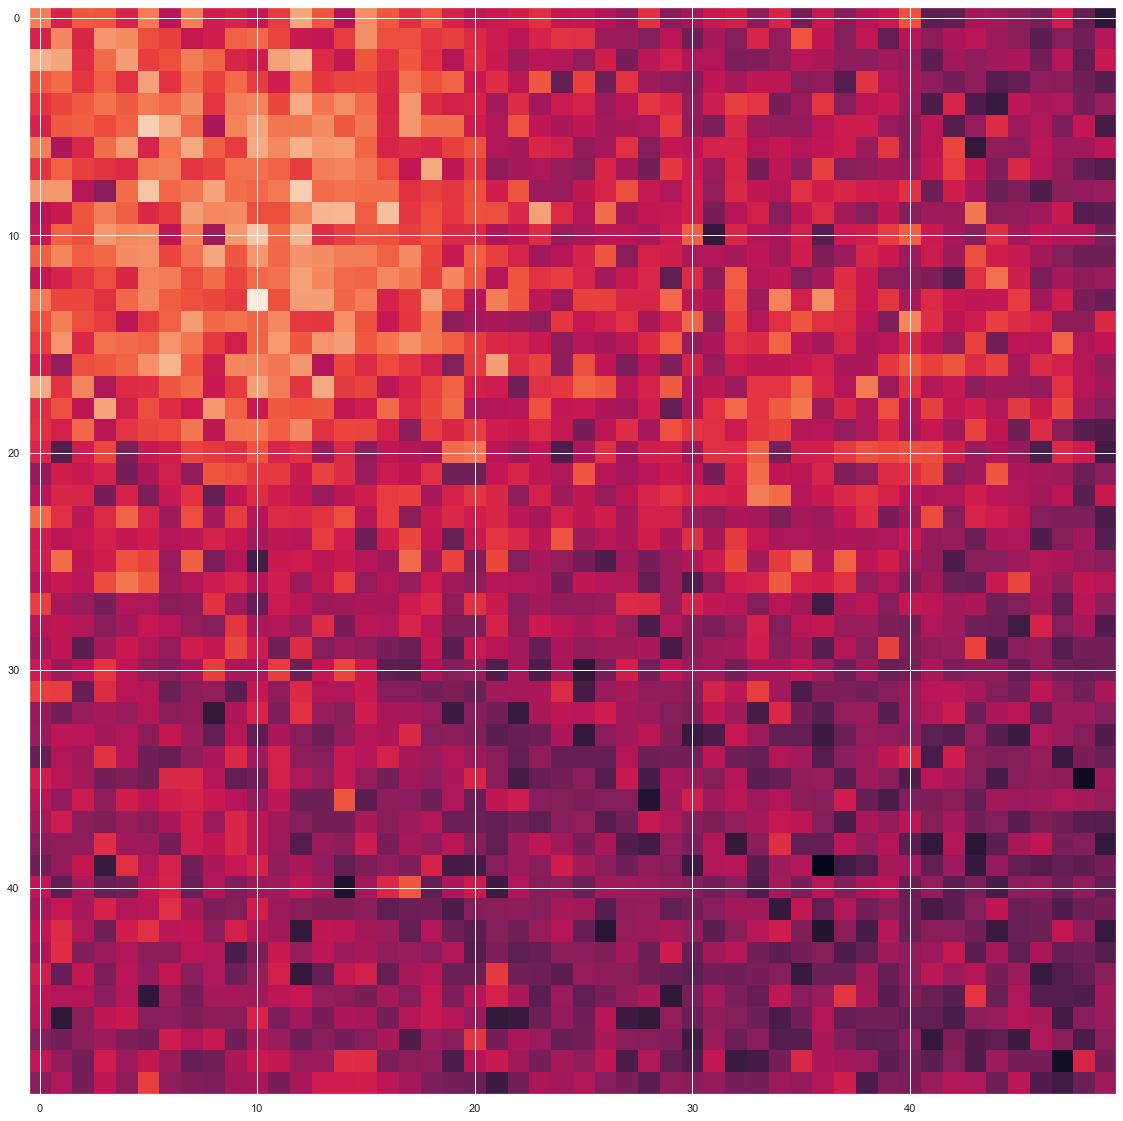

In [13]:
n_x         = 50
x           = np.linspace(0, 1, n_x)
y           = np.linspace(0, 1, n_x)

x_mesh, y_mesh  = np.meshgrid(x,y)
noise_level     = 0.25
frank           = fx.FrankeFunction(x_mesh, y_mesh, noise_level)

plt.imshow(frank)
plt.plot()


frank = np.ravel(frank)

(2500,)
(50, 50)


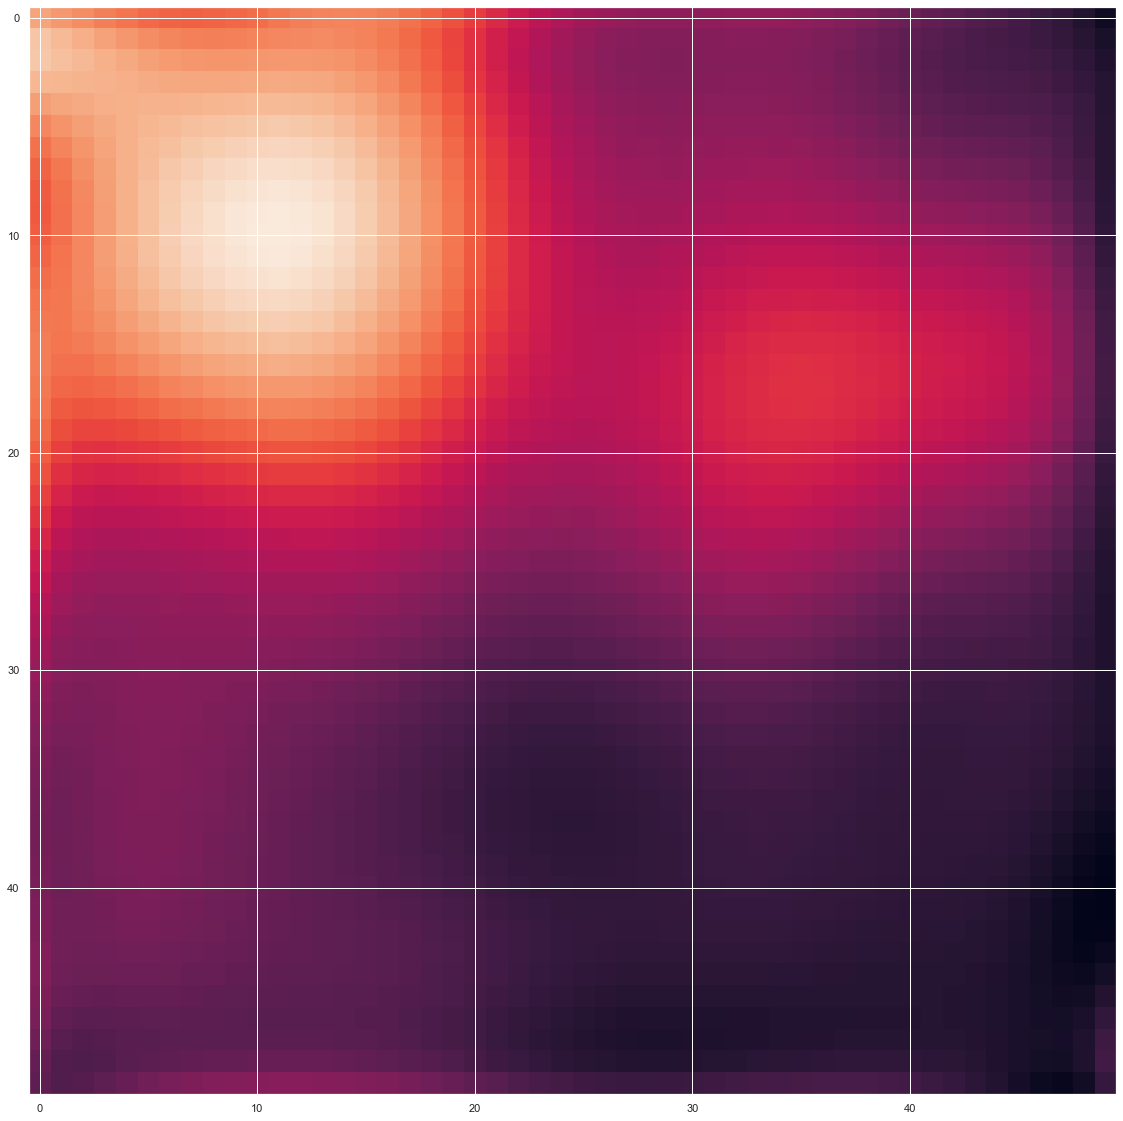

In [15]:
design = fx.DesignDesign(x,y,10)
data = frank
inverse_term   = np.linalg.inv(design.T.dot(design))
beta           = inverse_term.dot(design.T).dot(data)


prediction = design @ beta
print(prediction.shape)
pred = np.reshape(prediction,[n_x,n_x])
print(pred.shape)

plt.imshow(pred)
plt.show()

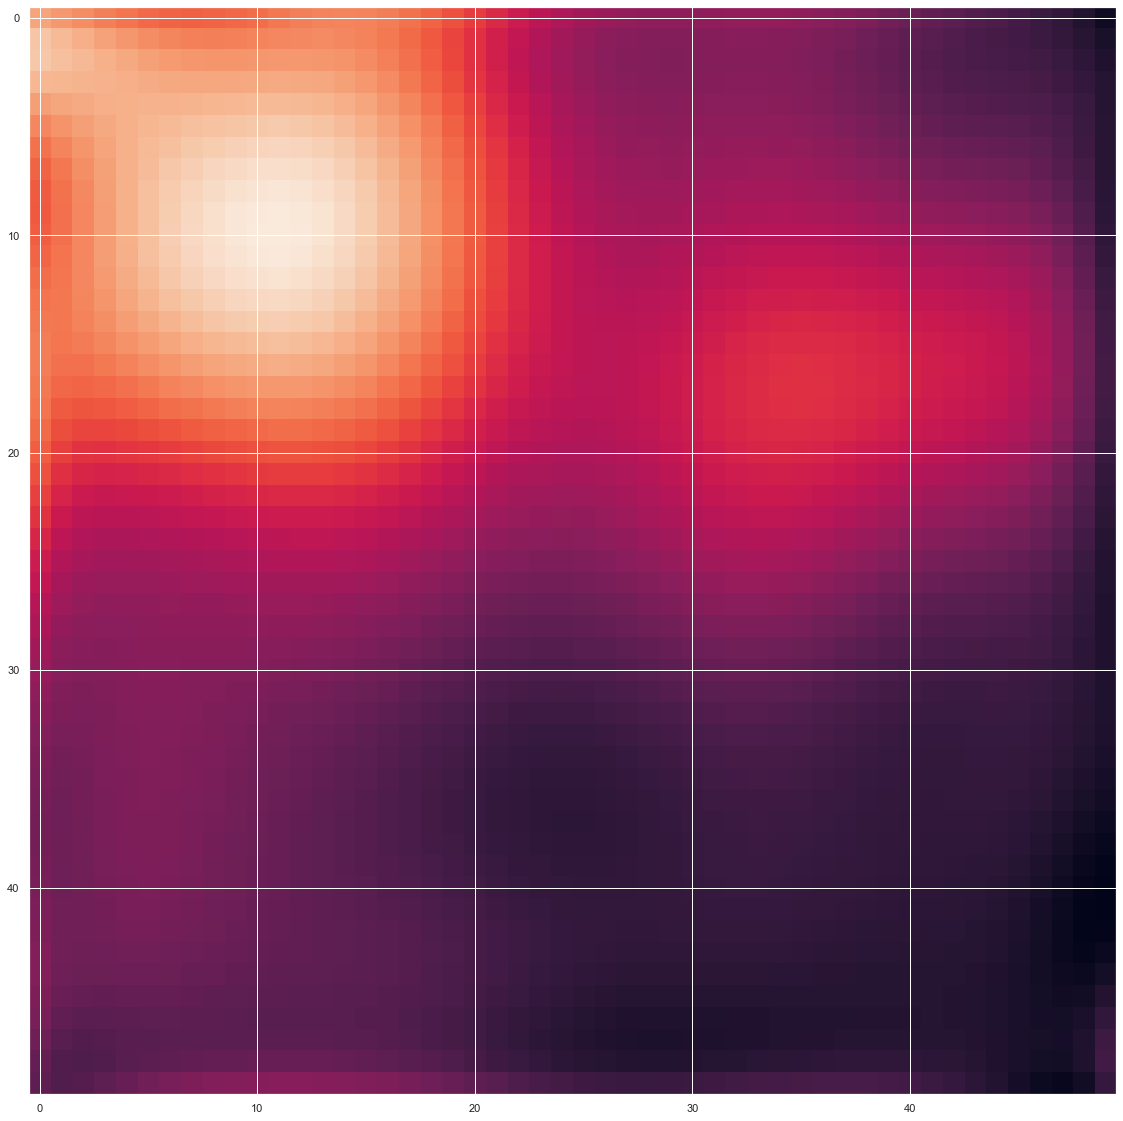

In [18]:
linreg = cl.OLS()
linreg.fit(design,frank)
pred_ols = linreg.predict(design)

plt.imshow(pred_ols.reshape([n_x,n_x]))
plt.show()

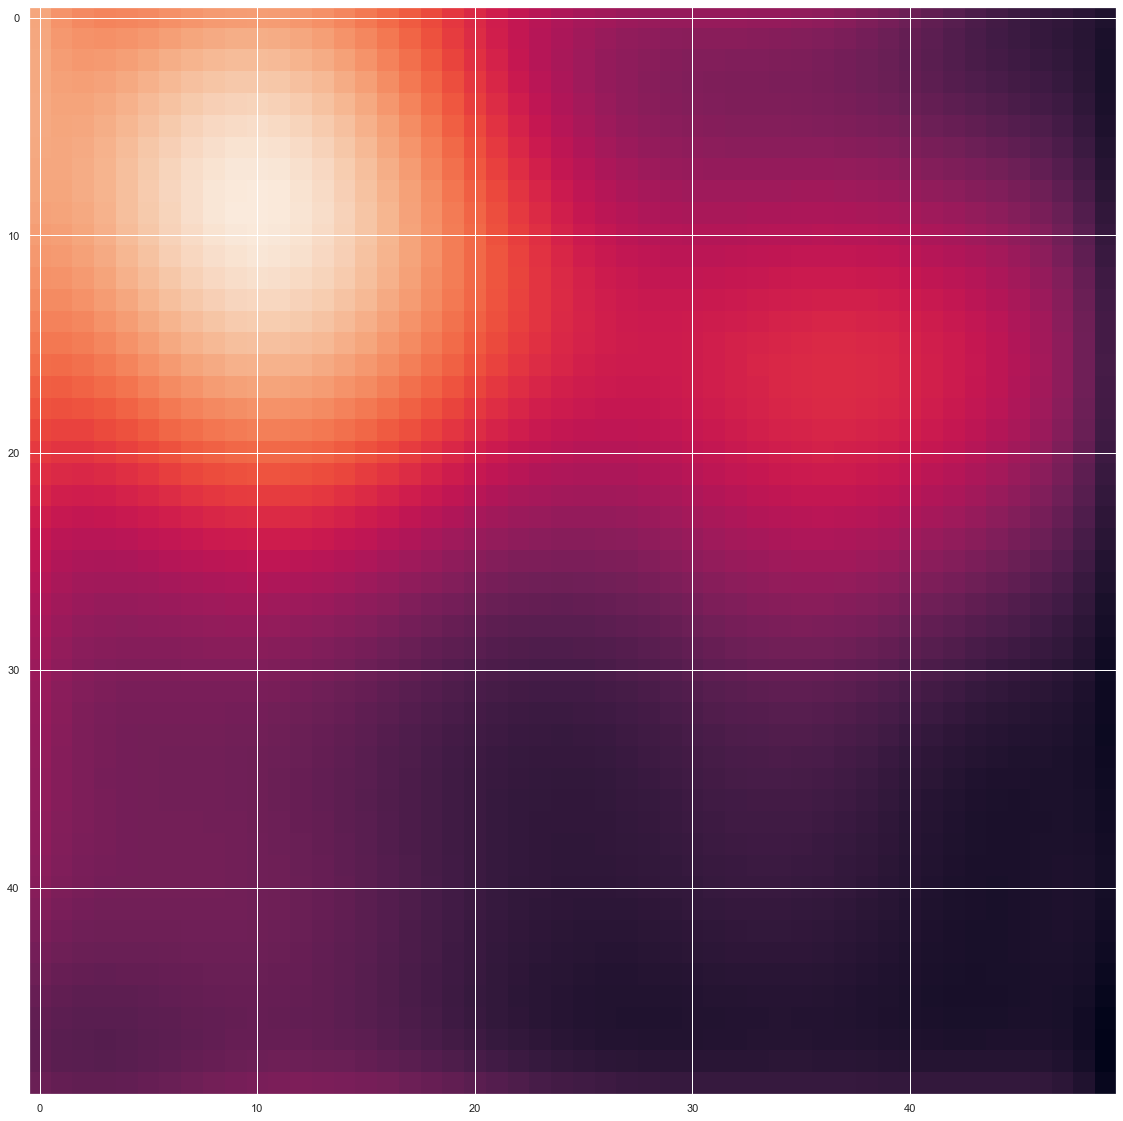

In [19]:
rid = cl.Ridge(_lambda=10e-07)
beta = rid.fit(design,frank)
pred_rid = rid.predict(design)

plt.imshow(pred_rid.reshape([n_x,n_x]))
plt.show()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 79.3061608684829, tolerance: 0.07891719905120821
  positive)


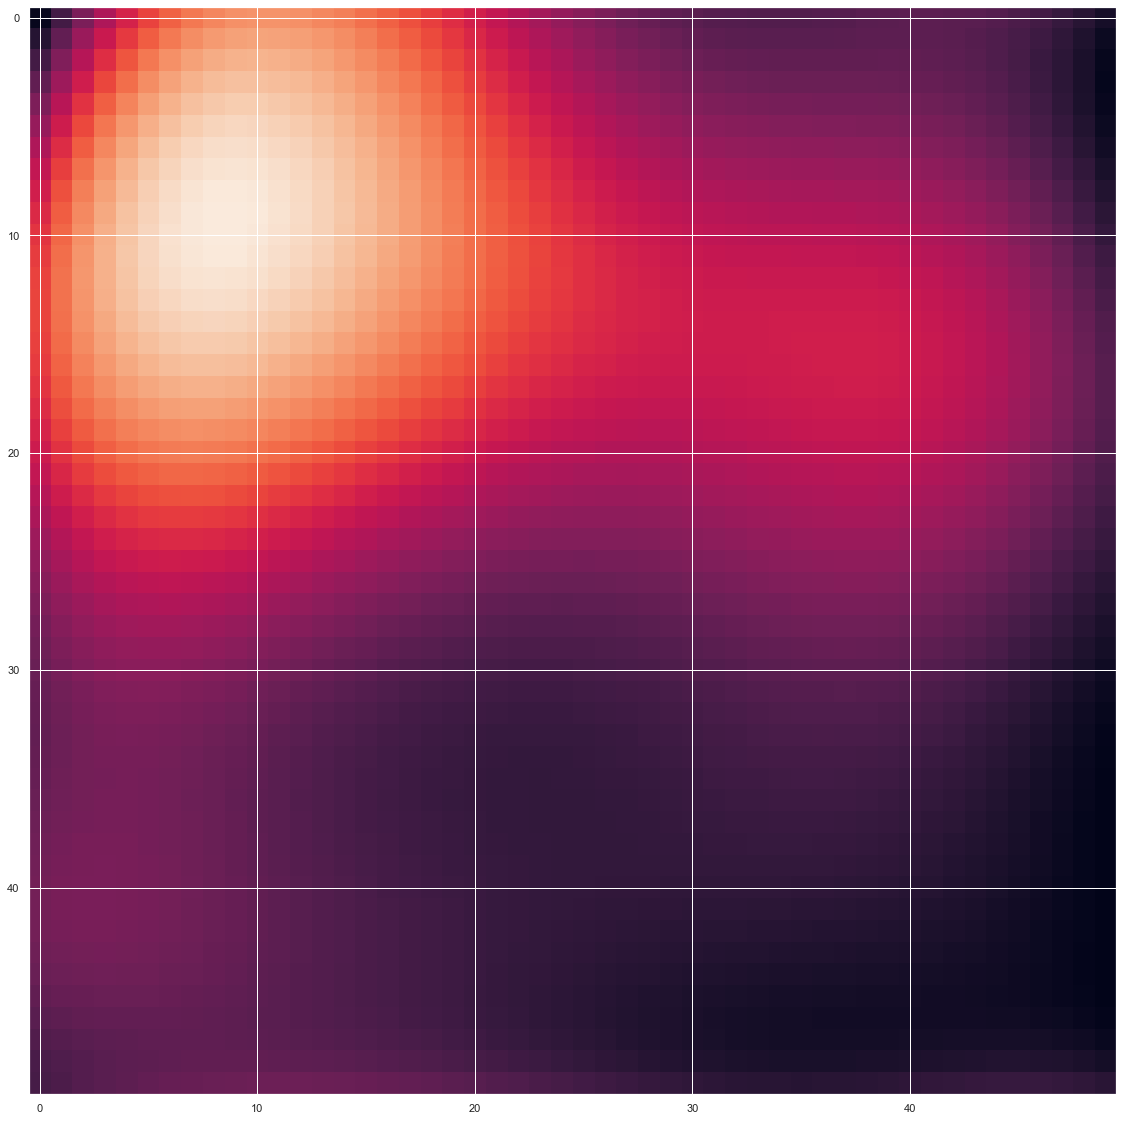

In [22]:
las = cl.Lasso_(_lambda=10e-07, intcept=False, max_it=10e4)
beta = las.fit(design[:,1:],frank)
pred_las = las.predict(design[:,1:])

plt.imshow(pred_las.reshape([n_x,n_x]))
plt.show()

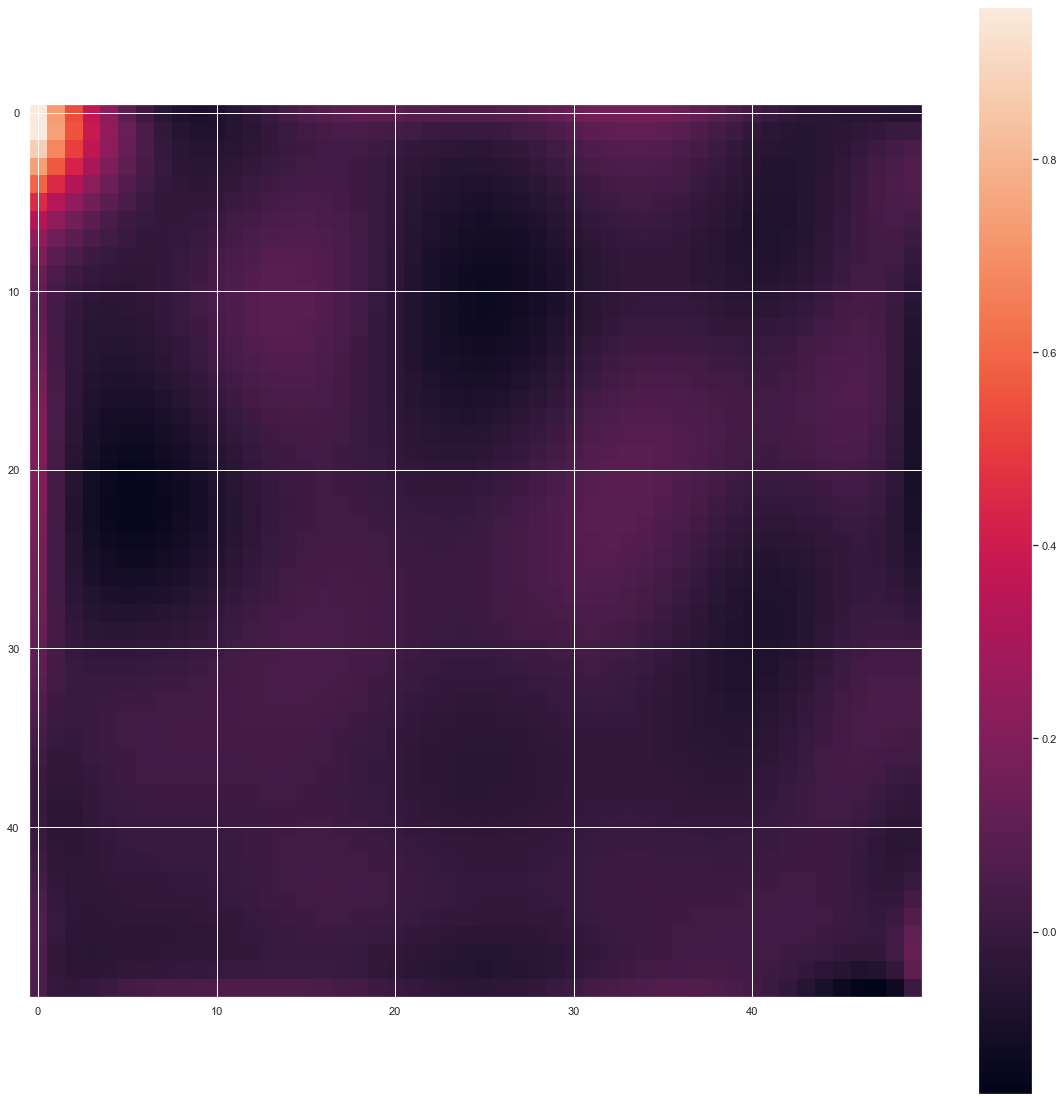

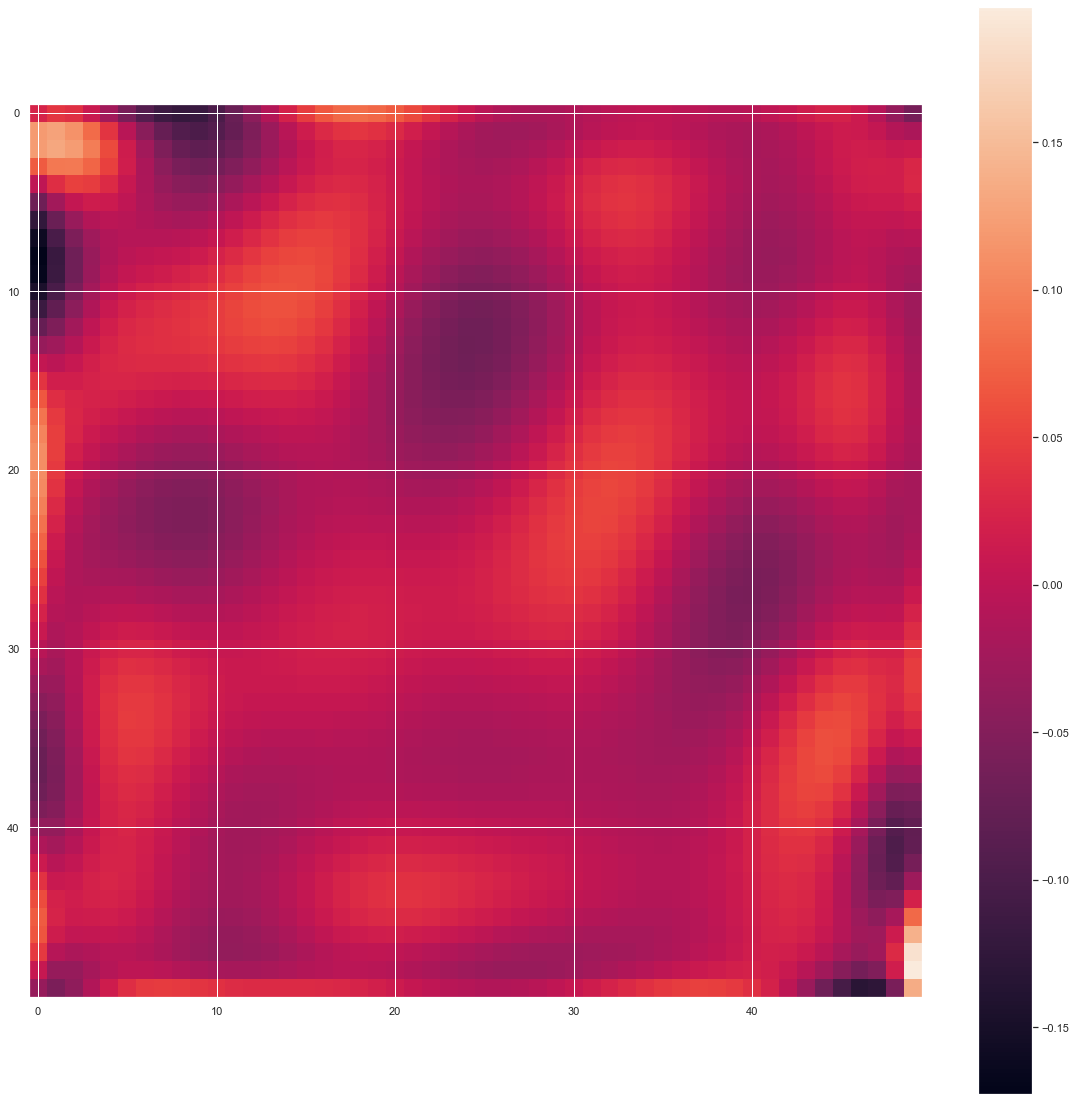

In [23]:
plt.imshow(pred_ols.reshape([n_x,n_x]) - pred_las.reshape([n_x,n_x]))
plt.colorbar()
plt.show()

plt.imshow(pred_ols.reshape([n_x,n_x]) - pred_rid.reshape([n_x,n_x]))
plt.colorbar()
plt.show()

In [35]:
import pandas as pd
import os
import numpy as np


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score


# Importing various packages
from random import random, seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import sys


from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor



# Reading file into data frame
cwd = os.getcwd()
filename = cwd + '/cred_card.xls'
nanDict = {}
df = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)


df.rename(index=str, columns={"default payment next month": "defaultPaymentNextMonth"}, inplace=True)

# Features and targets 
X = df.loc[:, df.columns != 'defaultPaymentNextMonth'].values
y = df.loc[:, df.columns == 'defaultPaymentNextMonth'].values

# Categorical variables to one-hot's
onehotencoder = OneHotEncoder(categories="auto")

X = ColumnTransformer(
    [("", onehotencoder, [3]),],
    remainder="passthrough"
).fit_transform(X)

X.shape

(30000, 26)

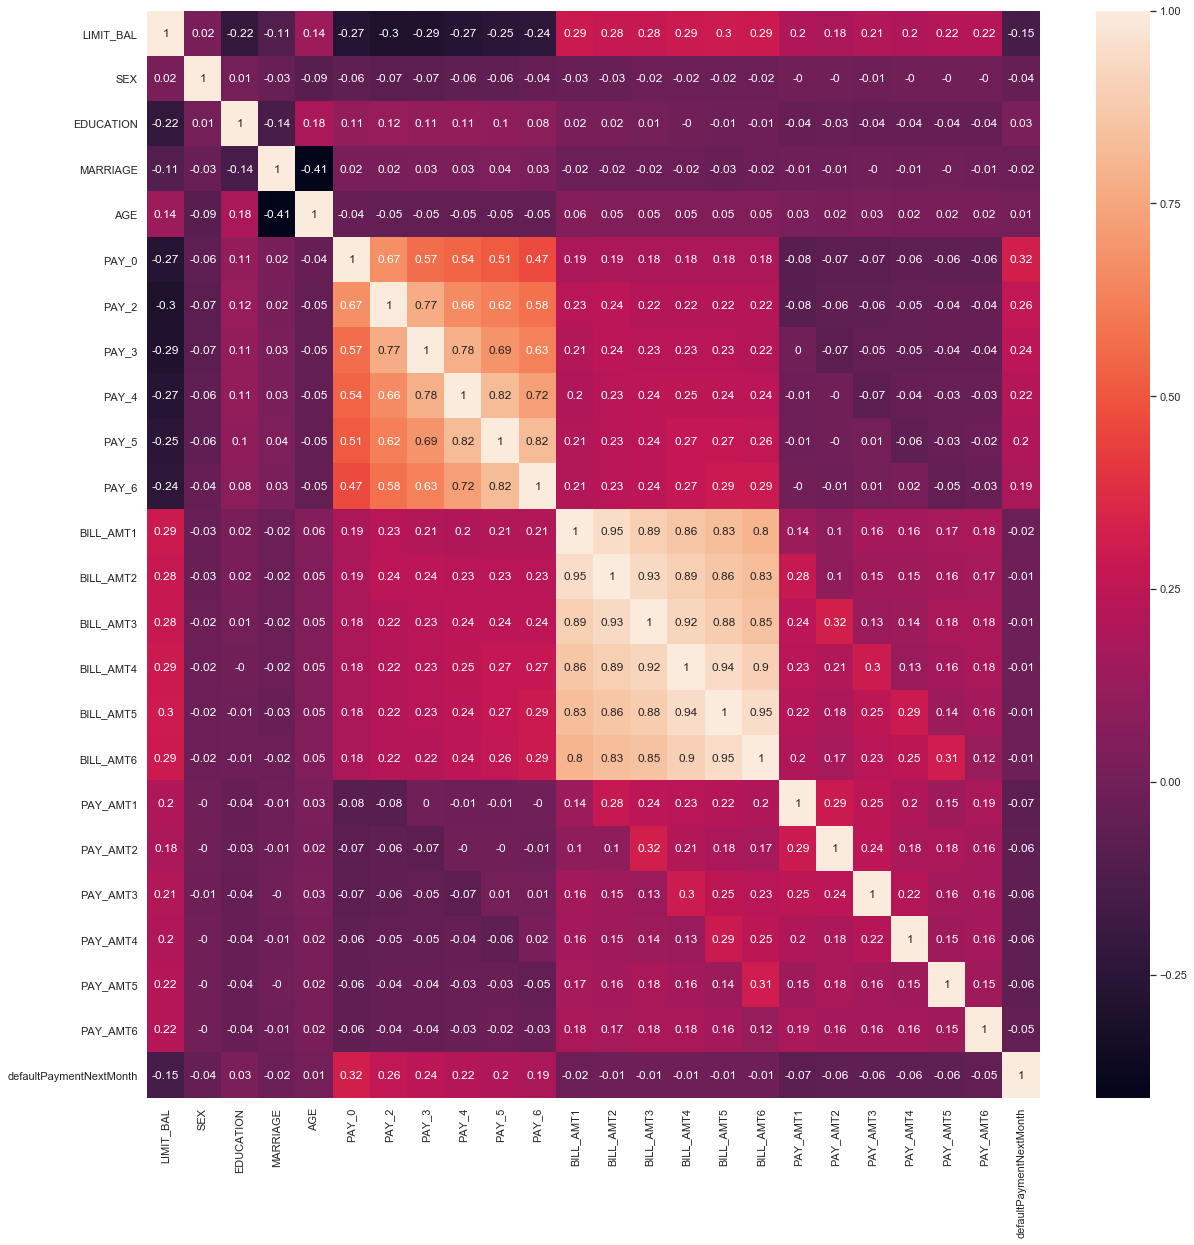

In [36]:
import seaborn as sns; sns.set()
correlation = df.corr().round(2)


# set the size of the figure
sns.set(rc={'figure.figsize':(20,20)})
# compute the pair wise correlation for all columns  
# use the heatmap function from seaborn to plot the correlation matrix
# annot = True to print the values inside the square
sns.heatmap(data=correlation, annot=True)
plt.show()

# Cost-funksjon:

$C(\hat{\beta}) = -\sum_{i=1}^n (y_i(\beta_0 + \beta_1x_i)-log(1+e^{\beta_0 + \beta_1x_i}))$

# Gradient descent:
 Stochastic gradient with mini-batches may give the best results - gjøre dette isteden for Gradient? 

In [52]:

# the number of datapoints
m = len(y)

xb = X
beta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)
beta = np.random.randn(X.shape[1],1)

eta = 0.1
Niterations = 1000

for iter in range(Niterations):
    gradients = 2.0/m*xb.T.dot(xb.dot(beta)-y) # Gradient formula from regression slides. 
    beta -= eta*gradients




//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]


# Stochastic Gradient descent. 

In [53]:
n = 100 #100 datapoints 
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
n_epochs = 10 #number of epochs

j = 0
for epoch in range(1,n_epochs+1):
    for i in range(m):
        k = np.random.randint(m) #Pick the k-th minibatch at random
        #Compute the gradient using the data in minibatch Bk
        #Compute new suggestion for 
        j += 1

In [54]:

xb = X
theta_linreg = np.linalg.inv(xb.T.dot(xb)).dot(xb.T).dot(y)

sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(X,y.ravel())



theta = np.random.randn(2,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/m*xb.T @ ((xb @ theta)-y)
    theta -= eta*gradients


xnew = np.array([[0],[2]])
xbnew = np.c_[np.ones((2,1)), xnew]
ypredict = xbnew.dot(theta)
ypredict2 = xbnew.dot(theta_linreg)


n_epochs = 50
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = xb[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(xnew, ypredict, "r-")
plt.plot(xnew, ypredict2, "b-")
plt.plot(x, y ,'ro')
plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.show()

//anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:1185: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 2 is different from 26)

In [ ]:
import segyio
import numpy as np
import pandas as pd 
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from ipywidgets import Button, Layout
from IPython.display import Javascript, display
import traitlets
from ipywidgets import widgets
from IPython.display import display
from tkinter import Tk, filedialog

import traitlets
from IPython.display import display
from ipywidgets import widgets
from tkinter import Tk, filedialog

In [ ]:
class SelectFilesButton(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectFilesButton, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "select excel file"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.select_files)

    @staticmethod
    def select_files(b):
        """Generate instance of tkinter.filedialog.
        Parameters
        ----------
        b : obj:
            An instance of ipywidgets.widgets.Button
        """
        # Create Tk root
        root = Tk()
        # Hide the main window
        root.withdraw()
        # Raise the root to the top of all windows.
        root.call('wm', 'attributes', '.', '-topmost', True)
        # List of selected fileswill be set to b.value
        b.files = filedialog.askopenfilename(multiple=True)

        b.description = "Files Selected"
        b.icon = "check-square-o"
        b.style.button_color = "lightgreen"
        
        
        

get_input = SelectFilesButton()

In [ ]:
class SelectAttributes(widgets.Button):
    """A file widget that leverages tkinter.filedialog."""

    def __init__(self, *args, **kwargs):
        """Initialize the SelectFilesButton class."""
        super(SelectAttributes, self).__init__(*args, **kwargs)
        # Add the selected_files trait
        self.add_traits(files=traitlets.traitlets.List())
        # Create the button.
        self.description = "select excel file"
        self.icon = "square-o"
        self.style.button_color = "orange"
        # Set on click behavior.
        self.on_click(self.keyattributes)
    
    def keyattributes(self, filename):
        nanDict = {}
        frame = pd.read_excel(filename, header=1, skiprows=0, index_col=0, na_values=nanDict)
        names = frame.columns
        
        for i in range(names.shape):
            super(SelectAttributes, self).__init__(*args, **kwargs)
            # Add the selected_files trait
            self.add_traits(files=traitlets.traitlets.List())
            # Create the button.
            self.description = "names[i]"
            self.icon = "square-o"
            self.style.button_color = "orange"

        
        
select = SelectAttributes()

In [ ]:
display(get_input)

In [ ]:
get_input.files[0]

In [ ]:
nanDict = {}
frame = pd.read_excel(get_input.files[0], header=1, skiprows=0, index_col=0, na_values=nanDict)

In [ ]:
names = frame.columns
print(names)


display(select)

In [ ]:
ting=widgets.Button().description = "select excel file"
widgets.Button.icon = "square-o"
widgets.Button.style.button_color = "orange"

display(ting)

In [ ]:
add_traits(files=traitlets.traitlets.List())